In [ ]:
# Author: Karasukaigan
# Time: 2021/7/6
# GitHub: https://github.com/Karasukaigan

In [2]:
pip install opencv-python

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import math

In [73]:
# Generate a background of the specified size.
def make_background(size_x, size_y, color_r, color_g, color_b):
  image_size = [size_x, size_y]
  thispixel = [color_r, color_g, color_b]
  thisline = []
  background = []

  for j in range(0,image_size[0]):
    thisline.append([thispixel[0], thispixel[1], thispixel[2]])
  for i in range(0,image_size[1]): 
    background.append(thisline)
  
  img = np.array(background, np.uint8) 
  return img


# Draw a cake. (offset_x,offset_y)is the offset relative to the center point.
def draw_cake(img, offset_x, offset_y):
  # (bottom_x,bottom_y) is the center point of the bottom.
  bottom_x = 500
  bottom_y = 650
  # radius is the radius of the bottom of the cake. height is the height of the cake.
  radius = 300
  radius_vertical = int(radius / 3)
  height = 230

  img = cv2.ellipse(img, (bottom_x + offset_x, bottom_y + 10 + offset_y), (radius, radius_vertical), 0.0, 0.0, 360.0, (200, 200, 200), -1)
  img = cv2.ellipse(img, (bottom_x + offset_x, bottom_y + offset_y), (radius, radius_vertical), 0.0, 0.0, 360.0, (250, 250, 250), -1)
  img = cv2.rectangle(img, (bottom_x - radius + offset_x, bottom_y - height + offset_y), (bottom_x + radius + offset_x, bottom_y + offset_y), (250, 250, 250), -1) 
  img = cv2.ellipse(img, (bottom_x + offset_x, bottom_y - height + offset_y), (radius, radius_vertical), 0.0, 0.0, 360.0, (255, 255, 255), -1)

  # Calculate all the coordinates of the top surface of the cake.
  a = radius - 50
  b = radius_vertical - 30
  candy_range = []
  x = 0
  y_max = 0
  y_min = 0
  for i in range(a * (-1), a + 1):
    x = i
    y_max = int(math.sqrt(pow(b,2) * (1 - (pow(x,2)/pow(a,2)))))
    y_min = int(y_max * (-1))
    for j in range(y_min, y_max + 1):
      candy_range.append([x + bottom_x + offset_x, j + bottom_y - height + offset_y])

  # Sprinkle the cake with candies.
  img = sprinkle_candy(img, candy_range, 50)

  # Put candles in this cake.
  img = draw_candle(img, int(bottom_x + offset_x), int(bottom_y - height + offset_y), [235, 60, 85], [250, 250, 250])

  return img


# Sprinkle the cake with candies. candy_range is calculated. num is the number of candies.
def sprinkle_candy(img, candy_range, num):
  candy_color = [(230, 50, 60), (90, 190, 195), (240, 210, 80), (240, 100, 105), (190, 200, 20)]
  for i in range(num):
    candy_coordinates = candy_range[random.randint(0, len(candy_range) - 1)]
    img = cv2.circle(img, (candy_coordinates[0], candy_coordinates[1]), 3, candy_color[random.randint(0, 4)], -1)
  return img


# Put candles in this cake. (x,y) is the coordinates of the bottom of the candle.
def draw_candle(img, x, y, candle_color1, candle_color2):
  radius = 15
  height = 150
  height_line = 10
  fire_width = 13
  step = 15
  step_size = int(height / step)

  # Generate candles with zebra stripes.
  flag = 1
  for i in range(0, height, step_size): 
    if flag == 1:
      img = cv2.ellipse(img, (x, y - i), (radius, radius - 10), 0.0, 0.0, 360.0, (candle_color1[0], candle_color1[1], candle_color1[2]), -1)
      img = cv2.rectangle(img, (x - radius, y - i - step_size), (x + radius, y - i), (candle_color1[0], candle_color1[1], candle_color1[2]), -1)
      flag += 1
    elif flag == 0:
      img = cv2.ellipse(img, (x, y - i), (radius, radius - 10), 0.0, 0.0, 360.0, (candle_color2[0], candle_color2[1], candle_color2[2]), -1)
      img = cv2.rectangle(img, (x - radius, y - i - step_size), (x + radius, y - i), (candle_color2[0], candle_color2[1], candle_color2[2]), -1)
      flag += 1
    if flag >= 2:
      flag = 0
  img = cv2.ellipse(img, (x, y - height), (radius, radius - 10), 0.0, 0.0, 360.0, (candle_color1[0] + 10, candle_color1[1] + 10, candle_color1[2] + 10), -1)

  # Generate cotton threads and flames.
  img = cv2.line(img, (x, y - height), (x, y - height - height_line), (250, 250, 250), 3, 8)
  img = cv2.ellipse(img, (x, y - height - height_line - (fire_width * 2)), (fire_width, fire_width * 2), 0.0, 0.0, 360.0, (255, 255, 100), -1)
  img = cv2.ellipse(img, (x, y - height - height_line - (int(fire_width * 1.5))), (int(fire_width * 0.5), int(fire_width * 1.5)), 0.0, 0.0, 360.0, (255, 255, 210), -1)

  return img


# Print blessings.
def print_blessings(img, str, x, y, size):
  img = cv2.putText(img, str, (x, y), cv2.FONT_HERSHEY_SIMPLEX, size, (255, 255, 255), 2)
  return img


def show_img(img):
  plt.figure(figsize=(10, 10),dpi=100)
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()

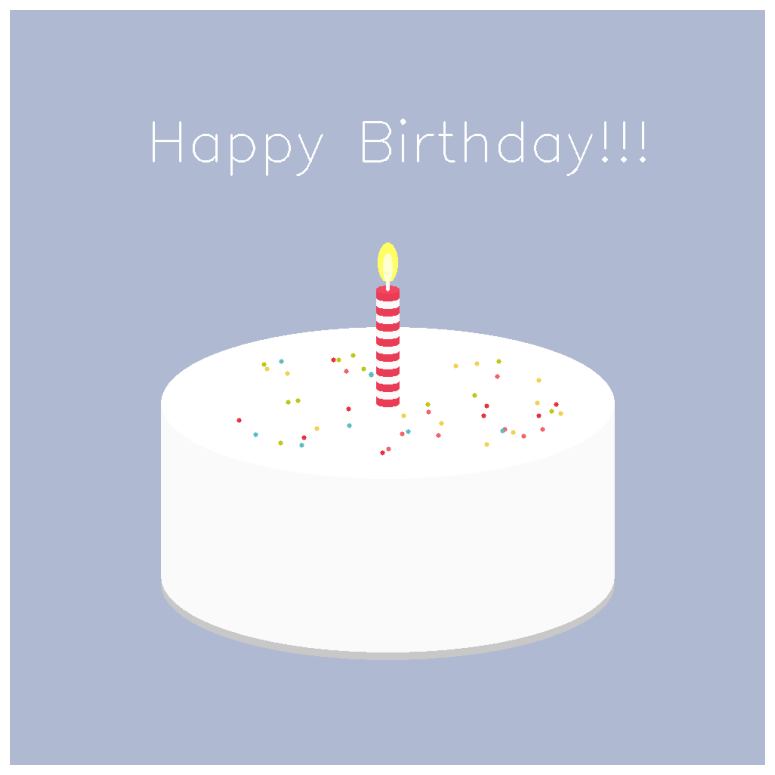

In [76]:
background = make_background(1000, 1000, 175, 185, 210)

img = draw_cake(background, 0, 100)

str = 'Happy Birthday!!!'
img = print_blessings(img, str, 180, 200, 2.5)

show_img(img)